In [2]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
#%matplotlib inline
import random
import math
import scipy.stats as stats

import numpy as np
from scipy.stats import ranksums

In [ ]:
# what do I want to build?
# a model in which there are three states, more or less..
# Straight
# Left
# Right

# first we take from the distribution we already have that!
# then we define left right straight. i could do this altogether if i could..
# then we have the model in the states, and the probability to switch from one state to the other is defined as 1/3 for each state and then I change those probabilities.
# we start with 1 and go..

In [8]:
prob_value = random.random()
prob_value

0.33566643697884346

In [ ]:
# when you shuffle data you pick from a distribution that if finite and at some point you run out of data to pick. when you pick from a distribution and return the value, then it is more similar to having an infinite amount of data to pick from. So not the same!!!

In [19]:
# straight bout has value but a straight bout after a left bout has a different prob than a straight after a straight! i think as a start i should make a model that is simpler, in which all probabilities are the same... just for a beginning plsss...
# all combos are ss,sl,sr, rs,rr,rl, ls,lr,ll

prob_ss = 1/3 # straight bout has value 0 / so it is going to be a straight after a straight with probability 1/3...
prob_sl = 2/3 # left bout has value -1


prob_ls = 1/3 # straight bout has value 0 / so it is going to be a straight after a straight with probability 1/3...
prob_ll = 2/3 # left bout has value -1


prob_rs = 1/3 # straight bout has value 0 / so it is going to be a straight after a straight with probability 1/3...
prob_rl = 2/3 # left bout has value -1


# this order will always be the same, so if prob straight is 0.1 and left 0.7 and right 0.2 than it will be 0.1, 0.8, 1
# these probabilites basically means, how likely is the animal to stay in one state for some time, given different parameter values...

bout_value = 1 # you do a few (ex. 50) iteration of starting with 1,0,-1 to show that it does not matter.
probability_value = 1/2
nr_iterations = 100000
prob_bout_change = 1/2 # 1. probability that the new bout is left vs probability that the new bout is right, given that it changes? or 2. Probability that the new bout is a different value from before, so if it is 1, then the next value has 2 choices, 0, -1 with different probabilities.. yeah the second ones says, probability that we have a different bout.????????????????????????????????????????

ls_values = []

for i in range(0,nr_iterations):
    ls_values.append(bout_value)
    # whatever initial_value is does not matter bcs symmetric? but you build it as if it wasn't symmetric idiot!
    probability_value = random.random() # this is just a random number between 0 and 1

    # now initial_value? we ask is it straight or left or right? bcs depending on what it is then probability on how it changes is different!
    # let's say our bout is straight

    if bout_value == 0: # if there was a straight bout before then: we have an S.

        # now we go through everything as if we have an initial straight bout
        if probability_value <prob_ss: # SS
            bout_value = 0
        elif ((probability_value<prob_sl) and (probability_value>prob_ss)): # SL
            bout_value = -1
        elif probability_value>prob_sl: # SR
            bout_value = +1
    elif bout_value == -1: # if there was a left bout before then:
        # now we go through everything as if we have an initial straight bout
        if probability_value <prob_ls: # SS
            bout_value = 0
        elif ((probability_value<prob_ll) and (probability_value>prob_ls)): # SL
            bout_value = -1
        elif probability_value>prob_ll: # SR
            bout_value = +1
        # left bout

    elif bout_value == 1: # if there was right bout before then:
        # now we go through everything as if we have an initial straight bout
        if probability_value <prob_rs: # SS
            bout_value = 0
        elif ((probability_value<prob_rl) and (probability_value>prob_rs)): # SL
            bout_value = -1
        elif probability_value>prob_rl: # SR
            bout_value = +1


        # right bout

(array([17132.,     0.,     0.,     0.,     0., 12611.,     0.,     0.,
            0., 70257.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

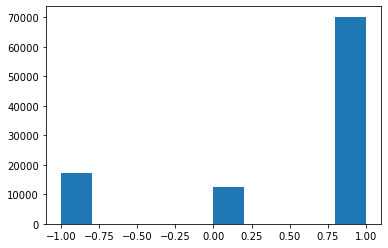

In [20]:
plt.hist(ls_values)

In [ ]:
# here goes the streak length function:


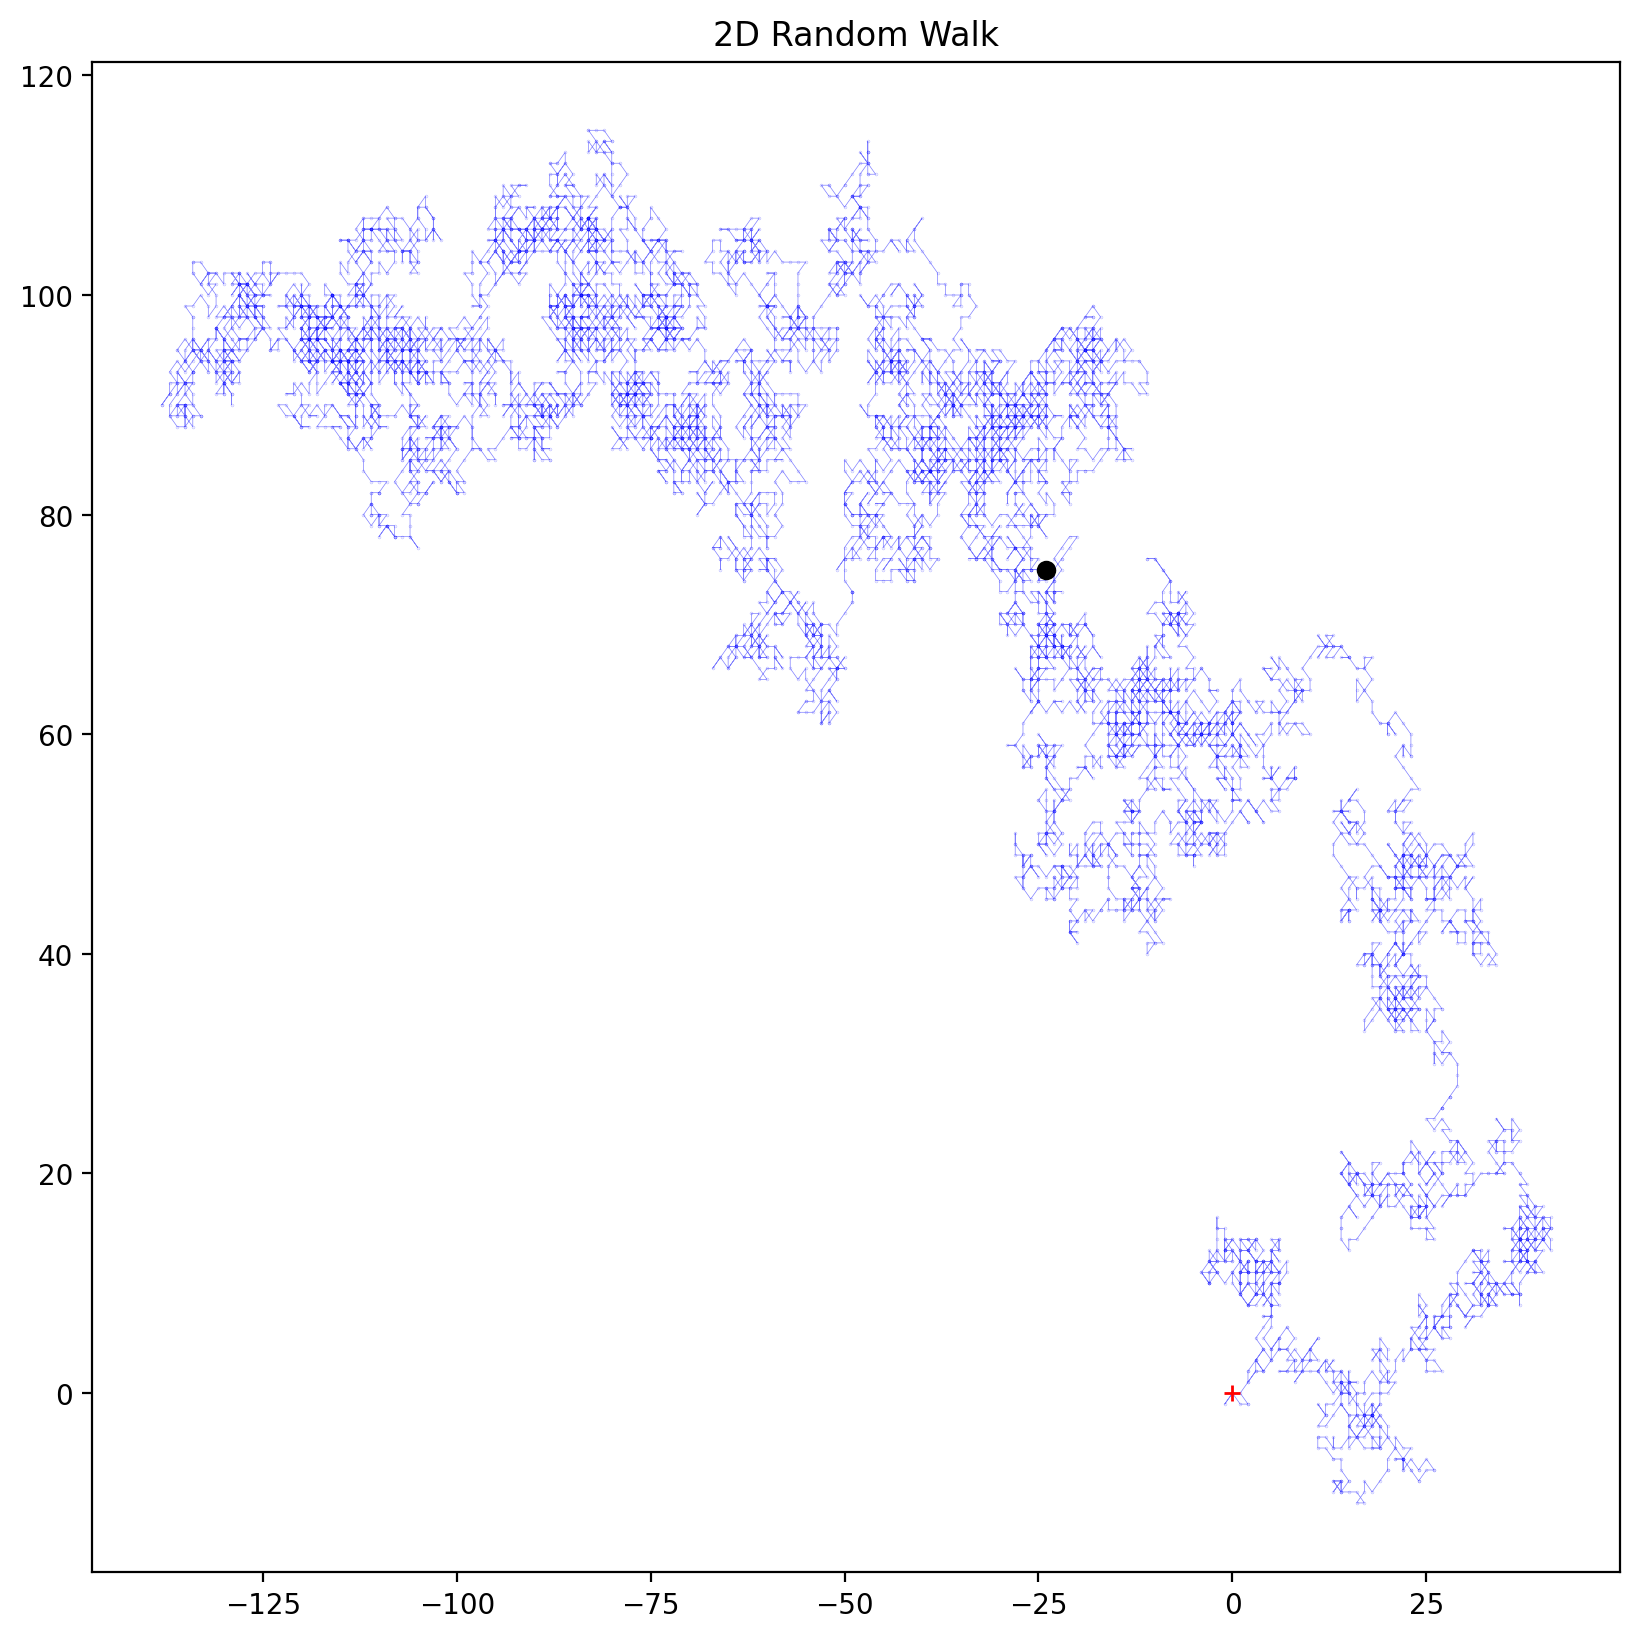

In [66]:
# lets start with the very easy lol. random walk in a +1,-1, but in a CIRCULAR ARENA and the fish  has tu turn one way when it reaches the corner.
# Define parameters for the walk
dims = 2
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
# Simulate steps in 2D
step_shape = (step_n,dims) # 1000 steps in 2 dimenstions?
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-');
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('2D Random Walk')
plt.tight_layout(pad=0)
#plt.savefig('plots/random_walk_2d.png',dpi=250);



In [ ]:
# also for now it would be fine to use this really.. and if everything goes perfectly well we go on and change. how big is the arena? so if we scale this and the arena compared to our fish its probably a very large step size lol.

#plt.savefig('plots/random_walk_2d.png',dpi=250);

In [ ]:
# we confine our arena to +-20... and we do a for loop instead. so whenever the x y coordinates reach these values((x^2 + y^2)<20 ), there is an obligated turn to the left or right. of at least blabla.

In [ ]:
# we could use the path, and every time we reach a corner we change it

In [67]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")
df_plaids = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed.hdf5")
df_11 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed_11_rings.hdf5")


print('done all data')

done all data


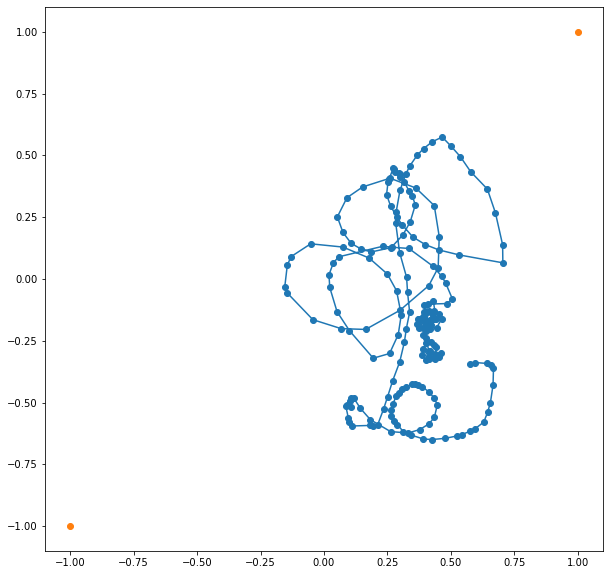

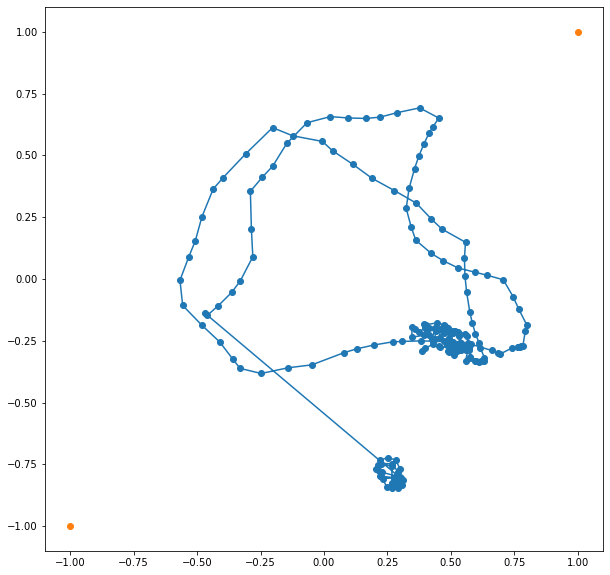

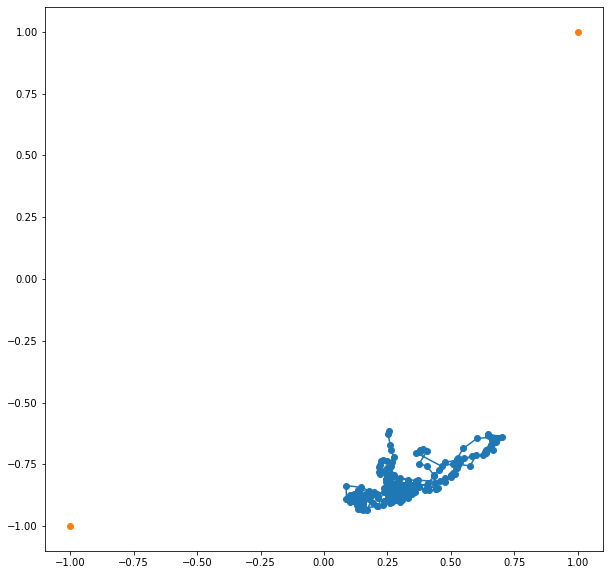

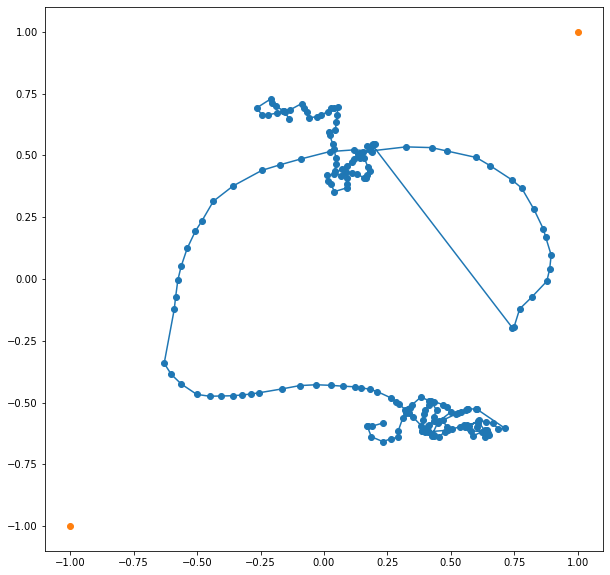

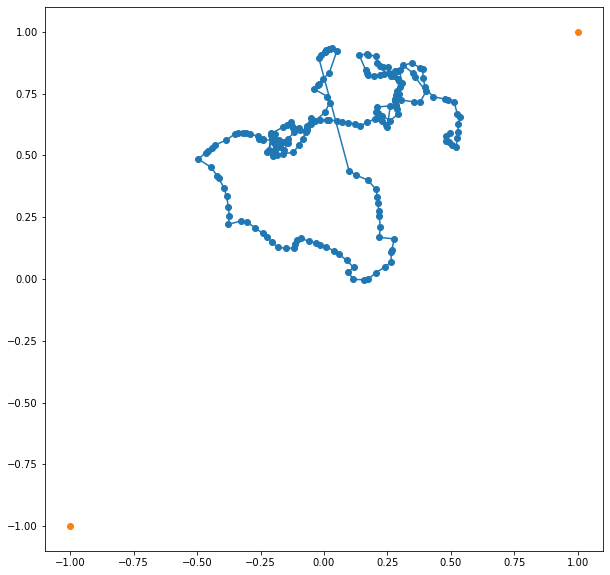

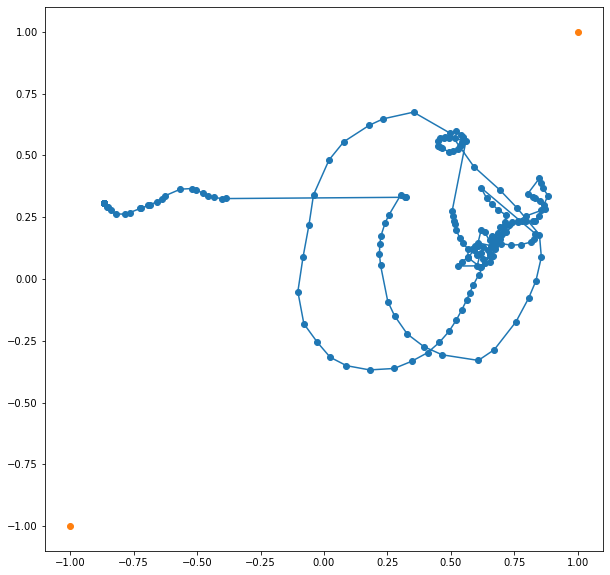

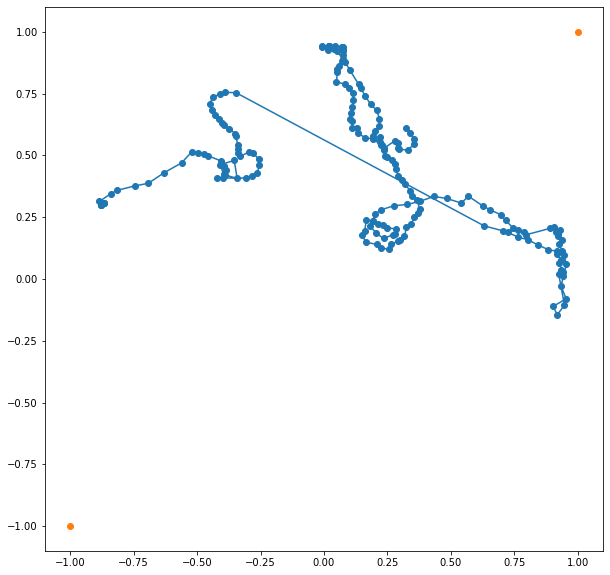

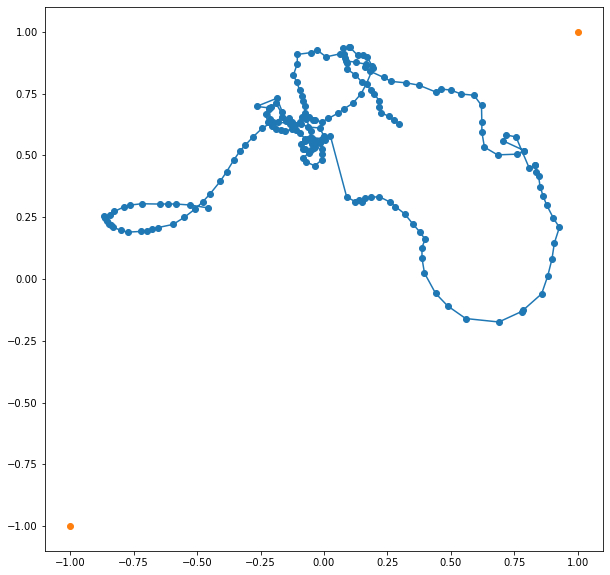

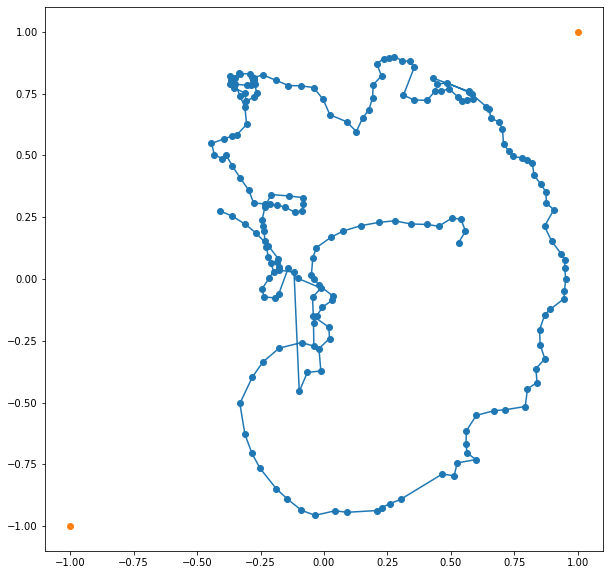

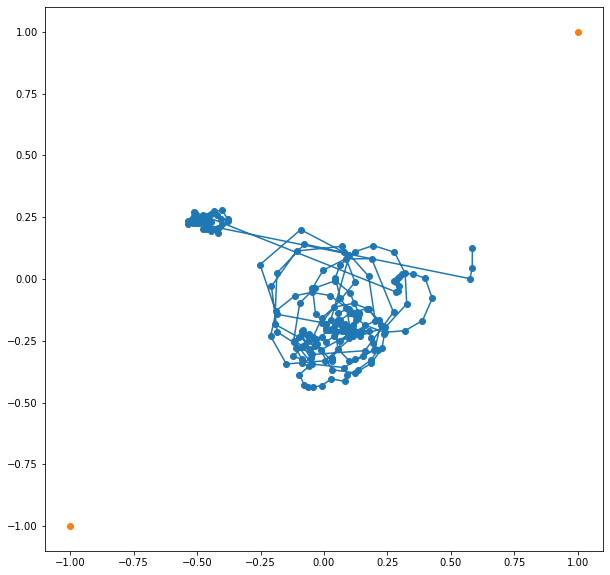

In [56]:
fish_0 = df[df['fish_ID']==0]
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(0,10):
    plt.plot(fish_0['start_x_position'][i*200:(i+1)*200],fish_0['start_y_position'][i*200:(i+1)*200])
    plt.scatter(fish_0['start_x_position'][i*200:(i+1)*200],fish_0['start_y_position'][i*200:(i+1)*200])

    plt.scatter([-1,1], [-1,1])
    plt.show()

ValueError: a must be 1-dimensional

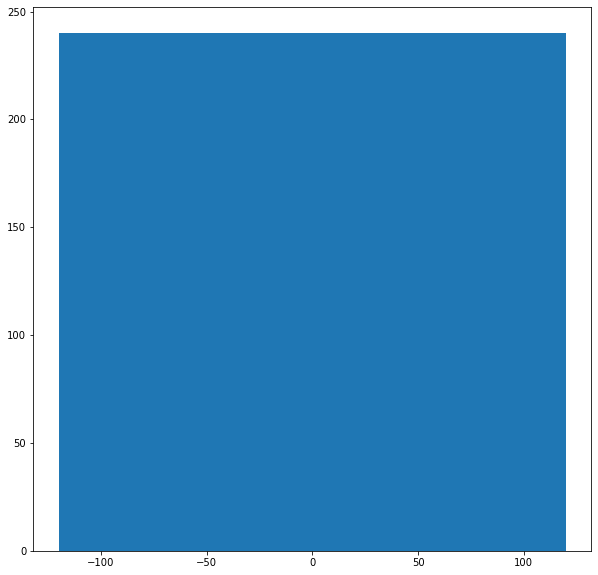

In [75]:
_# lets just plot one fish through some trials:
dims = 2
step_n = 10000
step_set = [np.arange(-120,120,0.1)] # identical step size! we could also draw from a distribution of steps, the distribution we get from our fish? yeah later on...
plt.hist(step_set)
origin = np.zeros((1,dims))
# Simulate steps in 2D
step_shape = (step_n,dims) # 10000 steps in 2 dimenstions?
steps = np.random.choice(a=step_set, size=step_shape) # but here
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-');
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.title('2D Random Walk')
plt.tight_layout(pad=0)

In [ ]:
# our steps are the fishes steps numpy 2d array of xy values:


In [35]:
print('length of sine and length of plaids df')
print(str(len(df)) + ' '+str(len(df_plaids)))

length of sine and length of plaids df
631925 1484432


In [41]:
print('motion forward: '+str(len(df[df['stimulus_name']== 'motion_forward'])) + '    leftup 45: '+str(len(df[df['stimulus_name']== 'motion_leftup45'])))

motion forward: 71044 leftup 45: 153795


In [42]:
df_plaids['stimulus_name'].unique()

array(['60_plaid_0', '60_plaid_45', '60_plaid_90', '75_plaid_45',
       '75_plaid_90', '75_plaid_0', '45_plaid_0', '45_plaid_45',
       '45_plaid_90'], dtype=object)

In [44]:
print(' 45_plaid_0 : '+str(len(df_plaids[df_plaids['stimulus_name']== '45_plaid_0'])) + '    60_plaid_0: '+str(len(df_plaids[df_plaids['stimulus_name']== '60_plaid_0']))+ '  75_plaid_0: '+str(len(df_plaids[df_plaids['stimulus_name']== '75_plaid_0'])))

 45_plaid_0 : 32603    60_plaid_0: 557829  75_plaid_0: 62476


Text(0.5, 1.0, 'Distribution of distance changes in one bout, sine eight directions')

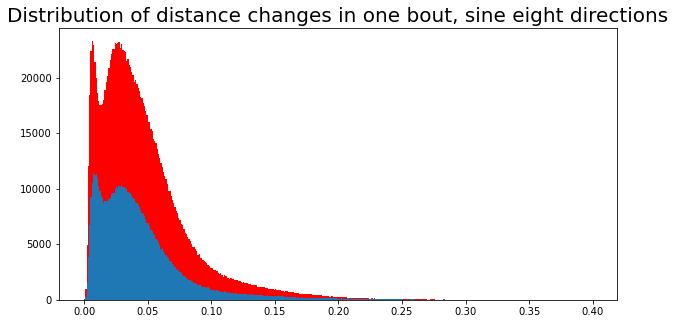

In [33]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.hist(df_plaids['distance_change'],bins = np.arange(0,0.4,0.001), color = 'red')

plt.hist(df['distance_change'],bins = np.arange(0,0.4,0.001))

plt.title('Distribution of distance changes in one bout, sine eight directions', size = 20)

Text(0.5, 1.0, 'Distribution of distance changes in one bout, sine eight directions')

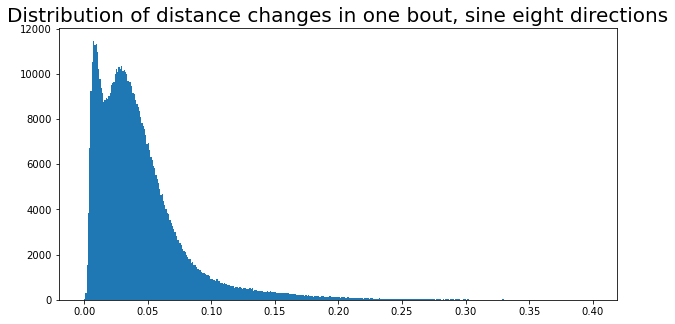

In [34]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.hist(df['distance_change'],bins = np.arange(0,0.4,0.001))
plt.title('Distribution of distance changes in one bout, sine eight directions', size = 20)

Text(0.5, 1.0, 'Distribution of estimated orientation change in one bout')

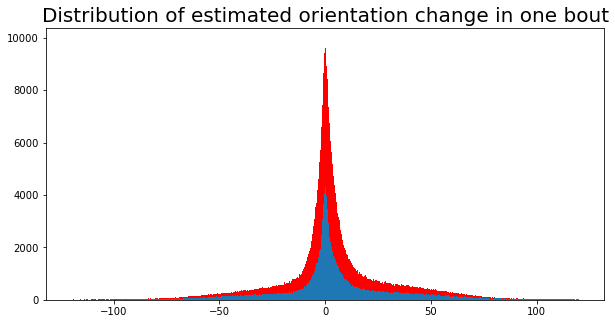

In [46]:
# all you have to do is get the distributions of orientation change for each...
plt.rcParams["figure.figsize"] = (10, 5)
plt.hist(df_plaids['estimated_orientation_change'],bins = np.arange(-120,120,0.1),color = 'red')

plt.hist(df['estimated_orientation_change'],bins = np.arange(-120,120,0.1))
plt.title('Distribution of estimated orientation change in one bout', size = 20)

In [ ]:
### Also remember Armin asked for the zigzags...

In [95]:
ls_es_orientation = df['estimated_orientation_change']
mean_ = ls_es_orientation.mean()
std_ = ls_es_orientation.std()
rs = []
for i in range(1000):
    rs.append(np.random.choice(ls_es_orientation, 5)) # so 5 numbers instead of 1, >1 means 2d array...
rs = np.array(rs)
rs

array([[-7.30437220e+01,  5.55297636e-01,  4.75820223e+01,
         4.43631838e+01, -3.56442247e-02],
       [-1.06764422e+00, -2.81477958e+00,  1.72048861e+01,
         4.25879507e-01,  7.89927215e+01],
       [-1.61235116e+00,  1.64378863e+02, -1.31394569e+00,
         2.45773555e+00, -2.67435961e+01],
       ...,
       [-4.73606863e+01,  7.65563021e+00,  3.82379413e+00,
         9.41999357e-01,  3.38559834e+00],
       [ 4.77682213e+00,  1.31408519e+01, -3.31189809e+01,
         1.83338168e+01,  4.83097165e+01],
       [ 3.59796557e+02,  3.10738309e+00,  5.03720011e+00,
        -2.05471391e+01,  1.87752748e+01]])

In [96]:
print('mean of SAMPLE  ' + str(rs.mean()) )
print('mean of DATA  ' + str(mean_))
print('std of SAMPLE  ' + str(rs.std()))
print('std of DATA  ' + str(std_))

mean of SAMPLE  4.281851249788282
mean of DATA  4.776795254863479
std of SAMPLE  42.86338872157489
std of DATA  42.53564432284808


[  3.88422751  18.54821265  27.43334106 -13.07325792  10.2251864 ]
<class 'numpy.ndarray'>
(1000,)
1000


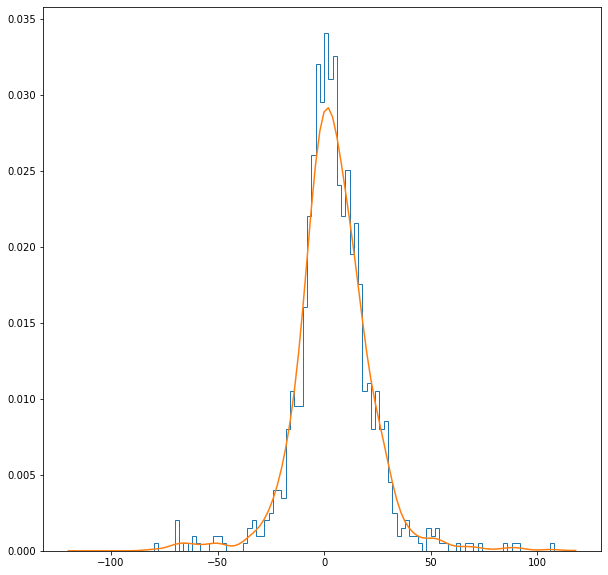

In [126]:
# now the mean for each sample...
x_bar = rs.mean(axis=1)
print(x_bar[:5])
print(type(x_bar))
print(np.shape(x_bar))
print(len(x_bar))
density = stats.gaussian_kde(x_bar)
n, x, _ = plt.hist(x_bar, bins=np.arange(-120, 120, 2), histtype=u'step', density=True)
plt.plot(x, density(x))
plt.show()

In [109]:
my_sample = np.random.choice(ls_es_orientation, 10000) # this is how you draw from a distribution. so --> I either draw the orientation, or the x y valurs though for now xy values makes no sense.  okay so we get ourselves 1000 values from the distribution. ( our random model) from this i make a list of left right straight and calculate the streak length. we also need a generalized distribution maybe, not only the distribution of our values. maybe this generalization is better, because when i change the distribution of angles, like make it a different one, then the distribution of leftrightstraights will also change.. as a whole package function lets just leave it like this for now..
# lets do it for now!!
# now we add a dimension to our sample.
# left right straight:

swim_orientation  = my_sample[:]
data_tuples = list(zip(my_sample,swim_orientation))
sample_df = pd.DataFrame(data_tuples, columns=['bout_orientation_angle','bout_orientation_trinary'])
bout_angle_threshold = 2
sample_df.loc[sample_df['bout_orientation_angle'] > bout_angle_threshold, "bout_orientation_trinary"] = 1
sample_df.loc[sample_df['bout_orientation_angle'] < - bout_angle_threshold, "bout_orientation_trinary"] = -1
sample_df.loc[abs(sample_df['bout_orientation_angle']) < bout_angle_threshold, "bout_orientation_trinary"] =0


In [129]:
sample_df

,bout_orientation_angle,bout_orientation_trinary
0,4.917995,1.0
1,-3.714118,-1.0
2,-13.372840,-1.0
3,11.657066,1.0
4,78.002163,1.0
...,...,...
9995,17.612466,1.0
9996,26.162109,1.0
9997,-3.568524,-1.0
9998,68.057827,1.0


(array([4.060e+03, 0.000e+00, 1.353e+03, 0.000e+00, 4.790e+02, 0.000e+00,
        1.910e+02, 0.000e+00, 1.010e+02, 0.000e+00, 3.900e+01, 0.000e+00,
        2.400e+01, 0.000e+00, 6.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <BarContainer object of 20 artists>)

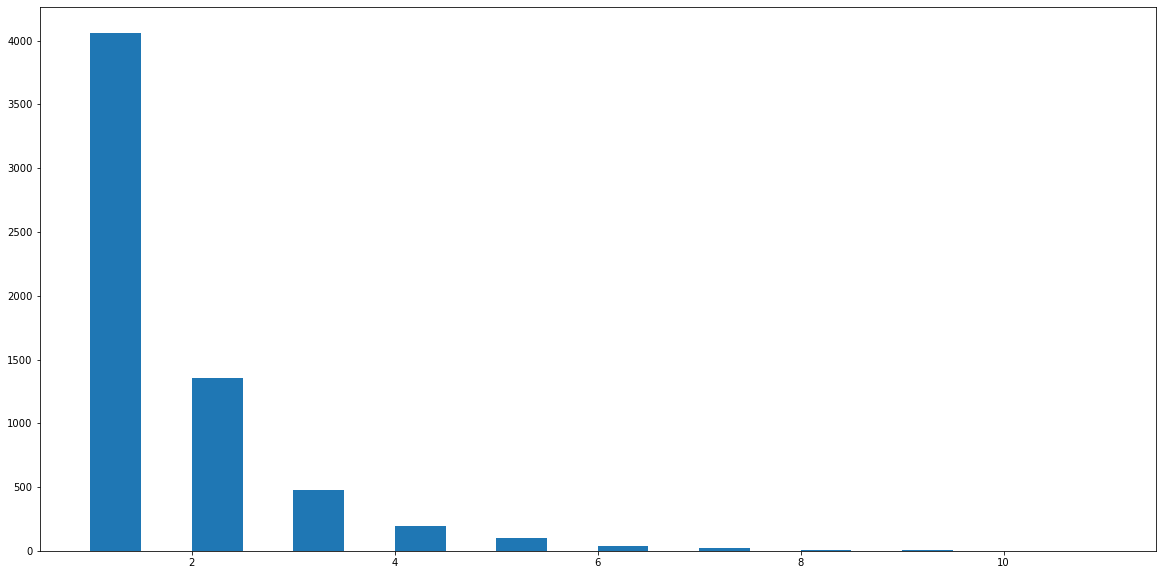

In [133]:
# now get the streak length:
# general?
list_of_directions = sample_df['bout_orientation_trinary']
def streak_length(list_of_directions):
    list_of_streaks = [] # i save here the length of the streak, defined as a_streak
    a_streak = 1 # we keep track of each streak length here, and when the streak is done, we append it to the list_of_streaks. streak length is 1 if only one bout was done in that direction
    for element in range(1,len(list_of_directions)): # we start from one bcs we compare with 0th element
        if list_of_directions[element-1]==list_of_directions[element]:
            a_streak += 1
        else:
            list_of_streaks.append(a_streak)
            a_streak = 1
    list_of_streaks.append(a_streak)
    list_of_streaks = [x for x in list_of_streaks if x <= 20]
    return list_of_streaks
plt.rcParams["figure.figsize"] = (20,10)
streak_sample = streak_length(list_of_directions)
plt.hist(streak_length(list_of_directions),bins = 20)

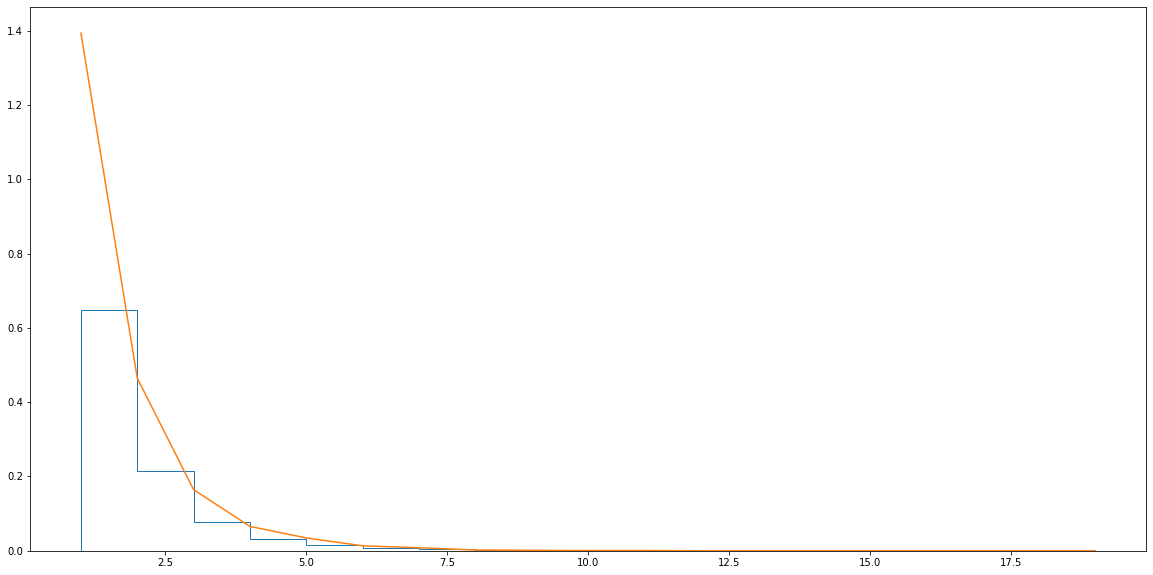

In [135]:
x_bar = streak_sample
density = stats.gaussian_kde(x_bar)
n, x, _ = plt.hist(x_bar, bins=np.arange(1, 20,1 ), histtype=u'step', density=True)
plt.plot(x, density(x))
plt.show()

In [ ]:
plt.hist(streak_length(list_of_directions), bins=20)
x_bar = streak_sample
density = stats.gaussian_kde(x_bar)
n, x, _ = plt.hist(x_bar, bins=np.arange(1, 20, 1), histtype=u'step', density=True)
plt.plot(x, density(x))
plt.show()